# <p style="color:black"> EDA OF MOVIE RAW DATA

<figure>
    <img src="movie header.jpg"
         alt="Movie Studio"
         width="400"
         height="200">
    <figcaption><center><bold>Microsoft's new movie studio!</figcaption>
</figure>

The purpose of this notebook is to perform exploratory data anlysis of the movie studio information that was provided to our group for the Phase 1 Project. When looking at the data, it can be broken up into two types:

1. An extract from IMDB, which is presented in a .db database file, and
2. Various CSV style files from different movie analysis websites.

This notebook's analysis will be structured as such:

- Analysis of the database file
- Analysis of the high priority CSV files (mainly, `bom.movie_gross.csv.gz`)
- Analysis of the remaining CSV files
- Preliminary thoughts on combination of files, and
- Preliminary thoughts on the group project story

# <p style="color:black"> DATABASE SECTION


## <p style="color:black"> Database - Short summary of findings


In short, the database information gives a lot of color and background to each of the movie_id's. From the movie_id, we can determine genre, geography, language, and the people who are involved in the film through use of SQL combination scripts.

This database will likely become relevant once we are able to put more numbers and analysis to the performance of the movies, which will likely come from the csv files.

See the section on the CSV files for more analysis

## <p style="color:black"> Analysis of the database file

To begin, we will import the SQL lite database package and import the database

In [464]:
import sqlite3
import pandas as pd
import numpy as np
conn = sqlite3.connect("Raw Data/im.db")
cur = conn.cursor()

Let's take a look at the names of all the tables, and compare it to the schema that was presented in the intro materials:

In [465]:
df = pd.read_sql("""
SELECT name as table_name
FROM sqlite_master
WHERE type = 'table';
""", conn)
df

,table_name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [329]:
df.head()

,table_name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings


<figure>
    <img src="movie_data_erd.jpeg"
         alt="Database Schema"
         width="600"
         height="300">
    <figcaption><center><bold>It is clear from analyzing the tables that the schema jpg is accurate and the database is loaded</figcaption>
</figure>

### <p style="color:black"> Table: Persons

In [330]:
df_persons = pd.read_sql("""
SELECT *
FROM persons
""", conn)
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [331]:
df_persons.head(5)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [332]:
df_persons_IDname = df_persons.filter(['person_id', 'primary_name'], axis=1)
df_persons_IDname.head(10)

,person_id,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
5,nm0062879,Ruel S. Bayani
6,nm0063198,Bayou
7,nm0063432,Stevie Be-Zet
8,nm0063618,Jeff Beal
9,nm0063750,Lindsay Beamish


Conclusion:
- The primary key of this data is likely person_id
- This table looks like a mostly complete list of persons, names, and their professions
- Primary professions has an embedded list of data inside of it
- The most useful columns for this are likely person_id and primary_profession, as they will link certain tables together

### <p style="color:black"> Table: Principals

In [333]:
df_principals = pd.read_sql("""
SELECT *
FROM principals
""", conn)
df_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [334]:
df_principals.tail(5)

,movie_id,ordering,person_id,category,job,characters
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None
1028185,tt9692684,5,nm10441595,producer,producer,None


In [335]:
df_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [336]:
df_principals['category'].value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [337]:
df_p_dirmovieID = df_principals.filter(['person_id', 'movie_id', 'category'], axis=1)

In [338]:
df_p_dirmovieID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1028186 non-null  object
 1   movie_id   1028186 non-null  object
 2   category   1028186 non-null  object
dtypes: object(3)
memory usage: 23.5+ MB


In [339]:
df_directors_IDs = df_p_dirmovieID.loc[df_p_dirmovieID['category'].isin(['director'])]

In [340]:
df_directors_IDs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146393 entries, 1 to 1028183
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  146393 non-null  object
 1   movie_id   146393 non-null  object
 2   category   146393 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [341]:
df_directors_IDs.head(12)

,person_id,movie_id,category
1,nm0398271,tt0111414,director
8,nm0362736,tt0323808,director
18,nm1145057,tt0417610,director
28,nm0707738,tt0469152,director
35,nm0776090,tt0473032,director
41,nm0001053,tt0475290,director
42,nm0001054,tt0475290,director
51,nm0197636,tt0477302,director
61,nm0007082,tt0780548,director
71,nm1275939,tt0879405,director


In [342]:
df_directors_id = df_directors_IDs.merge(df_persons_IDname, on='person_id', how='inner')
df_directors_id.head(7)

,person_id,movie_id,category,primary_name
0,nm0398271,tt0111414,director,Frank Howson
1,nm0398271,tt5573596,director,Frank Howson
2,nm0362736,tt0323808,director,Robin Hardy
3,nm1145057,tt0417610,director,Alejandro Chomski
4,nm1145057,tt5291716,director,Alejandro Chomski
5,nm1145057,tt4551544,director,Alejandro Chomski
6,nm0707738,tt0469152,director,Alyssa R. Bennett


Conclusion:
- The primary key of this table appears to be person_id
- This table goes into detail on which person is related to which movie
- Characters is a list of all relevant characters for an actor
- The most useful columns for this are likely person_id, category, and movie_id, as they could provide links for data attributes

### <p style="color:black"> Table: Known For, Directors, and Writers

Note: These tables appear similar in nature in that they are connector tables or subsets of the Principals table. This section will explore how/if these tables can be combined

In [343]:
df_principals = pd.read_sql("""
SELECT *
FROM known_for
""", conn)
df_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [344]:
df_principals.head(2)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241


In [345]:
df_directors = pd.read_sql("""
SELECT *
FROM directors
""", conn)
df_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [346]:
df_directors.head(2)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585


In [347]:
df_writers = pd.read_sql("""
SELECT *
FROM writers
""", conn)
df_writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [348]:
df_writers.head(2)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726


Conclusion:
- All tables contain movie_id and person_id fields and are complete
- Principals and directors tables have the same numer of records (1.6m), Writers has about a fourth of that
- It is not immediately clear the benefit of combining these together, however when we formulate our hypothesis, perhaps it will become more evident of the value of linking movies and their associated people (writers, directors, etc)

### <p style="color:black"> Table: Movie Basics

In [349]:
df_movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [350]:
df_movie_basics.head(4)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"


In [351]:
df_mbasics = df_movie_basics.filter(['movie_id', 'primary_title', 'genres'], axis=1)
df_mbasics.head()

,movie_id,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


Conclusion:
- Seems like a solid index for basic movie information
- Primary key is likely 'movie_id'
- Genres contains a list of genres
- Mostly complete except for runtime and genres, which look about 90% complete

### <p style="color:black"> Table: Movie Ratings

In [352]:
df_movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
""", conn)
df_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [353]:
df_movie_ratings.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [354]:
df_movie_ratings['averagerating'] = df_movie_ratings['averagerating']
df_high_rtg = df_movie_ratings[df_movie_ratings['averagerating'] >= 5.0]
df_high_rtgs = df_high_rtg[df_high_rtg['numvotes'] >= 3000]
df_high_rtgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 10 to 73761
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       4799 non-null   object 
 1   averagerating  4799 non-null   float64
 2   numvotes       4799 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 150.0+ KB


In [355]:
df_high_rtgs.head()

,movie_id,averagerating,numvotes
10,tt1171222,5.1,8296
12,tt1181840,7.0,5494
16,tt1210166,7.6,326657
17,tt1212419,6.5,87288
19,tt1229238,7.4,428142


In [356]:
df_title_rtg = df_mbasics.merge(df_high_rtgs, on='movie_id', how='inner')
df_title_rtg.head(2)

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,Drama,6.9,4517
1,tt0315642,Wazir,"Action,Crime,Drama",7.1,15378


In [357]:
df_title_rtg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4798
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       4799 non-null   object 
 1   primary_title  4799 non-null   object 
 2   genres         4799 non-null   object 
 3   averagerating  4799 non-null   float64
 4   numvotes       4799 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 225.0+ KB


In [358]:
df_movies_info = df_title_rtg.merge(df_directors_id, on='movie_id', how='inner')
df_movies_info.head()

,movie_id,primary_title,genres,averagerating,numvotes,person_id,category,primary_name
0,tt0069049,The Other Side of the Wind,Drama,6.9,4517,nm0000080,director,Orson Welles
1,tt0315642,Wazir,"Action,Crime,Drama",7.1,15378,nm2349060,director,Bejoy Nambiar
2,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,nm0758574,director,Walter Salles
3,tt0365545,Nappily Ever After,"Comedy,Drama,Romance",6.4,6287,nm2223783,director,Haifaa Al-Mansour
4,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,nm0291082,director,Scott Frank


In [359]:
df_movies_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5026 entries, 0 to 5025
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       5026 non-null   object 
 1   primary_title  5026 non-null   object 
 2   genres         5026 non-null   object 
 3   averagerating  5026 non-null   float64
 4   numvotes       5026 non-null   int64  
 5   person_id      5026 non-null   object 
 6   category       5026 non-null   object 
 7   primary_name   5026 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 353.4+ KB


In [360]:
df_movies_info.value_counts(['genres'])

genres                  
Drama                       296
Comedy,Drama                243
Comedy,Drama,Romance        198
Comedy                      178
Drama,Romance               153
                           ... 
Adventure,Drama,Sport         1
Comedy,Documentary,Drama      1
Drama,History,Sci-Fi          1
Adventure,Family,Sci-Fi       1
Family                        1
Length: 379, dtype: int64

In [361]:
df_movies_info.value_counts(['averagerating'])

averagerating
6.3              240
7.2              223
6.2              218
6.6              213
7.1              212
6.4              209
6.1              200
6.5              197
6.7              191
5.8              191
5.7              189
6.8              188
7.0              183
7.4              172
7.3              163
5.9              152
6.0              152
6.9              149
5.4              142
7.5              138
5.6              132
7.6              132
5.5              114
5.3              112
5.2              110
7.7              106
7.8              104
5.1               86
8.0               66
5.0               63
8.1               58
7.9               54
8.2               45
8.3               43
8.4               20
8.5               20
8.8               11
8.7                7
8.6                6
9.4                3
9.3                3
9.2                2
9.5                2
9.0                2
9.1                1
8.9                1
9.7                1

Conclusion:
- Contains rating information by movie ID
- Data set appears complete
- Could be useful for understanding a movie's reception vs it's revenue

### <p style="color:black"> Table: Movie AKA's

In [362]:
df_movie_akas = pd.read_sql("""
SELECT *
FROM movie_akas
""", conn)
df_movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [363]:
df_movie_akas.tail(15)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
331688,tt9705860,3,Dusan Vukotic hrvatski okarovac,HR,None,None,None,0.0
331689,tt9723084,1,Anderswo. Allein in Afrika,DE,None,imdbDisplay,None,0.0
331690,tt9723084,2,Anderswo. Allein in Afrika,None,None,original,None,1.0
331691,tt9726638,1,Qi Tian Da Sheng 2,CN,yue,imdbDisplay,None,0.0
331692,tt9726638,2,Monkey King: The Volcano,None,None,original,None,1.0
331693,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,None,0.0
331694,tt9755806,1,Big Shark,US,None,None,None,0.0
331695,tt9755806,2,Большая Акула,RU,None,None,None,0.0
331696,tt9755806,3,Big Shark,None,None,original,None,1.0
331697,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0


Conclusion:
- Could be useful for understanding the region and language a particular movie was distributed in
- Mostly complete, but contains a lot of missing values in the language, attributes, and types fields

# <p style="color:black"> CSV SECTION

## <p style="color:black"> Short Summary of CSV Files

The CSV files will take some work to combine, but at the end of the day, they will contain important pieces of information we can use for our story. In my mind, the following data points are important and we can get them from the following (files)

For each movie:
- The movie ID (tn.movie_budgets.csv.gz)
- The title (movie_budgets.csv.gz)
- The studio (bom.movie_gross.csv.gz)
- The domestic gross (bom.movie_gross.csv.gz -or- movie_budgets.csv.gz)
- The international gross (bom.movie_gross.csv.gz -or- movie_budgets.csv.gz)
- The year it came out (bom.movie_gross.csv.gz)
- The genre (movie_info.tsv.gz)
- The director (movie_info.tsv.gz)
- The writer (rt.movie_info.tsv.gz)

For each studio:
- Movies published by that studio (bom.movie_gross.csv.gz)
- Domestic and international gross of that studio over time (rt.movie_info.tsv.gz)
 - Maybe we can throw in what kind of genres each studio excel in 




## <p style="color:black"> Analysis of CSV files

The CSV files are made up of the five files
- Bom.Movie_gross.csv.gz
- rt.movie_info_tsv.gz
- rt.reviews.tsv.gz
- tmdb.movies.csv.gz
- tn.movie_budgets.csv.gz

## <p style="color:black"> CSV File: bom.movie_gross.csv.gz


In [364]:
df_movie_gross = pd.read_csv("Raw Data/bom.movie_gross.csv.gz")
import seaborn as sns
import matplotlib.pyplot as plt 

In [401]:
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [402]:
df_movie_gross.head()

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [400]:
#df_movie_gross.pivot_table(index='studio', columns='year', values='domestic_gross', aggfunc='sum')

Conclusion:
- This will be a very important data set, as it contains the domestic and foreign gross for each movie
- This data is not complete, and does not have a movie_id for movies which could link it back to the IMDB movie database
- Additionally, we do not know what currency the foreign currency is denominated in

## <p style="color:black"> CSV File: rt.movie_info.tsv.gz

In [368]:
df_movie_info = pd.read_csv("Raw Data/rt.movie_info.tsv.gz", sep='\t')

In [369]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [370]:
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Conclusion:
- Man, this data sucks
- There is no movie title! More likely, we will need to pull together the director, year, and studio of each of these in order to link it to other data tables
- Unclear what kind of value add information this creates for our hypothesis

## <p style="color:black"> CSV File: rt.reviews.tsv.gz

In [371]:
df_movie_reviews = pd.read_csv("Raw Data/rt.reviews.tsv.gz", sep='\t', encoding='latin1')

In [372]:
df_movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [373]:
df_movie_reviews.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


Conclusion:
- Again, this data is pretty rough. There isn't a good way to identify what the movie title is, nor what studio it is affiliated with.
- It does give a rating for each movie, but identifying what movie it related to will be tough


## <p style="color:black"> CSV File: tmdb.movies.csv.gz

In [374]:
df_movie_db2 = pd.read_csv("Raw Data/tmdb.movies.csv.gz")

In [375]:
df_movie_db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [376]:
df_movie_db2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Conclusion:
- Complete list of data for movies. Has some type of ID, but unclear what kind of ID this is
- Contains popularity data, likely some kind of user generated reviews, possibily?


## <p style="color:black"> CSV File: tn.movie_budgets.csv.gz

In [377]:
df_budgets = pd.read_csv("Raw Data/tn.movie_budgets.csv.gz")

In [378]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [379]:
##
##Financial Data CSV

In [380]:
df_financial_data = pd.read_csv('financial_data.csv')

In [381]:
df_financial_data.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_x,profit,profit_margin,...,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,year_y
0,0,7,2015-11-06,The Peanuts Movie,99000000.0,130178411.0,250091610.0,2015,151091610.0,60.414506,...,tt2452042,movie,The Peanuts Movie,The Peanuts Movie,0,2015-01-01 00:00:00,\N,88,"Adventure,Animation,Comedy",2015.0
1,2,9,2018-11-21,Robin Hood,99000000.0,30824628.0,84747441.0,2018,-14252559.0,-16.817687,...,tt4532826,movie,Robin Hood,Robin Hood,0,2018-01-01 00:00:00,\N,116,"Action,Adventure,Drama",2018.0
2,3,12,2017-05-19,Alien Covenant,97000000.0,74262031.0,238521247.0,2017,141521247.0,59.332763,...,tt2316204,movie,Alien Covenant,Alien: Covenant,0,2017-01-01 00:00:00,\N,122,"Horror,Sci-Fi,Thriller",2017.0
3,6,14,2012-07-13,Ice Age Continental Drift,95000000.0,161321843.0,879765137.0,2012,784765137.0,89.201663,...,tt1667889,movie,Ice Age Continental Drift,Ice Age: Continental Drift,0,2012-01-01 00:00:00,\N,88,"Adventure,Animation,Comedy",2012.0
4,7,16,2010-05-27,Sex and the City 2,95000000.0,95347692.0,294680778.0,2010,199680778.0,67.761725,...,tt1261945,movie,Sex and the City 2,Sex and the City 2,0,2010-01-01 00:00:00,\N,146,"Comedy,Drama,Romance",2010.0


In [382]:
df_financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1179 non-null   int64  
 1   id                 1179 non-null   int64  
 2   release_date       1179 non-null   object 
 3   movie              1179 non-null   object 
 4   production_budget  1179 non-null   float64
 5   domestic_gross     1179 non-null   float64
 6   worldwide_gross    1179 non-null   float64
 7   year_x             1179 non-null   int64  
 8   profit             1179 non-null   float64
 9   profit_margin      1179 non-null   float64
 10  movie_and_year     1179 non-null   object 
 11  tconst             1179 non-null   object 
 12  titleType          1179 non-null   object 
 13  primaryTitle       1179 non-null   object 
 14  originalTitle      1179 non-null   object 
 15  isAdult            1179 non-null   int64  
 16  startYear          1179 

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import string
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'

In [384]:
transtab = str.maketrans(dict.fromkeys(punct, ''))

df_movies_info['primary_title'] = '|'.join(df_movies_info['primary_title'].tolist()).translate(transtab).split('|')

In [385]:
df_movies_info.head(5)

,movie_id,primary_title,genres,averagerating,numvotes,person_id,category,primary_name
0,tt0069049,The Other Side of the Wind,Drama,6.9,4517,nm0000080,director,Orson Welles
1,tt0315642,Wazir,"Action,Crime,Drama",7.1,15378,nm2349060,director,Bejoy Nambiar
2,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,nm0758574,director,Walter Salles
3,tt0365545,Nappily Ever After,"Comedy,Drama,Romance",6.4,6287,nm2223783,director,Haifaa Al-Mansour
4,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,nm0291082,director,Scott Frank


In [386]:
df_financial_data = df_financial_data.dropna()

In [387]:
df_financial_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1178
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1179 non-null   int64  
 1   id                 1179 non-null   int64  
 2   release_date       1179 non-null   object 
 3   movie              1179 non-null   object 
 4   production_budget  1179 non-null   float64
 5   domestic_gross     1179 non-null   float64
 6   worldwide_gross    1179 non-null   float64
 7   year_x             1179 non-null   int64  
 8   profit             1179 non-null   float64
 9   profit_margin      1179 non-null   float64
 10  movie_and_year     1179 non-null   object 
 11  tconst             1179 non-null   object 
 12  titleType          1179 non-null   object 
 13  primaryTitle       1179 non-null   object 
 14  originalTitle      1179 non-null   object 
 15  isAdult            1179 non-null   int64  
 16  startYear          1179 

In [388]:
df_financial_data = df_financial_data.drop(['Unnamed: 0', 'id', 'startYear', 'endYear', 'year_y', 'originalTitle'], axis=1)

In [389]:
df_financial_data = df_financial_data.rename(columns={'tconst': 'movie_id', 'primaryTitle': 'primary_title'})

In [390]:
df_mf_combo = df_movies_info.merge(df_financial_data, on=['movie_id'], how='inner')

In [391]:
df_mf_combo.head()

,movie_id,primary_title_x,genres_x,averagerating,numvotes,person_id,category,primary_name,release_date,movie,...,worldwide_gross,year_x,profit,profit_margin,movie_and_year,titleType,primary_title_y,isAdult,runtimeMinutes,genres_y
0,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,nm0291082,director,Scott Frank,2014-09-19,A Walk Among the Tombstones,...,62108587.0,2014,34108587.0,54.917667,A Walk Among the Tombstones - 2014,movie,A Walk Among the Tombstones,0,114,"Action,Crime,Drama"
1,tt0376136,The Rum Diary,"Comedy,Drama",6.2,94787,nm0732430,director,Bruce Robinson,2011-10-28,The Rum Diary,...,21544732.0,2011,-23455268.0,-108.867764,The Rum Diary - 2011,movie,The Rum Diary,0,119,"Comedy,Drama"
2,tt0383010,The Three Stooges,"Comedy,Family",5.1,28570,nm0268370,director,Bobby Farrelly,2012-04-13,The Three Stooges,...,54052249.0,2012,24052249.0,44.498147,The Three Stooges - 2012,movie,The Three Stooges,0,92,"Comedy,Family"
3,tt0383010,The Three Stooges,"Comedy,Family",5.1,28570,nm0268380,director,Peter Farrelly,2012-04-13,The Three Stooges,...,54052249.0,2012,24052249.0,44.498147,The Three Stooges - 2012,movie,The Three Stooges,0,92,"Comedy,Family"
4,tt0427152,Dinner for Schmucks,Comedy,5.9,91546,nm0005366,director,Jay Roach,2010-07-30,Dinner for Schmucks,...,86796502.0,2010,17796502.0,20.503709,Dinner for Schmucks - 2010,movie,Dinner for Schmucks,0,114,Comedy


In [392]:
#df_mf_combo.value_counts(['genres'])

In [393]:
df_mf_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 978
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           979 non-null    object 
 1   primary_title_x    979 non-null    object 
 2   genres_x           979 non-null    object 
 3   averagerating      979 non-null    float64
 4   numvotes           979 non-null    int64  
 5   person_id          979 non-null    object 
 6   category           979 non-null    object 
 7   primary_name       979 non-null    object 
 8   release_date       979 non-null    object 
 9   movie              979 non-null    object 
 10  production_budget  979 non-null    float64
 11  domestic_gross     979 non-null    float64
 12  worldwide_gross    979 non-null    float64
 13  year_x             979 non-null    int64  
 14  profit             979 non-null    float64
 15  profit_margin      979 non-null    float64
 16  movie_and_year     979 non

In [394]:
df_mf_combos = df_mf_combo.sort_values(by=['profit_margin'], ascending=False)

In [395]:
df_mf_combos.head(15)

,movie_id,primary_title_x,genres_x,averagerating,numvotes,person_id,category,primary_name,release_date,movie,...,worldwide_gross,year_x,profit,profit_margin,movie_and_year,titleType,primary_title_y,isAdult,runtimeMinutes,genres_y
316,tt1536044,Paranormal Activity 2,Horror,5.7,93122,nm0931095,director,Tod Williams,2010-10-20,Paranormal Activity 2,...,177512032.0,2010,174512032.0,98.309974,Paranormal Activity 2 - 2010,movie,Paranormal Activity 2,0,91,"Horror,Mystery"
899,tt5052448,Get Out,"Horror,Mystery,Thriller",7.7,400474,nm1443502,director,Jordan Peele,2017-02-24,Get Out,...,255367951.0,2017,250367951.0,98.042041,Get Out - 2017,movie,Get Out,0,104,"Horror,Mystery,Thriller"
895,tt4975722,Moonlight,Drama,7.4,227964,nm1503575,director,Barry Jenkins,2016-10-21,Moonlight,...,65245512.0,2016,63745512.0,97.700991,Moonlight - 2016,movie,Moonlight,0,111,Drama
540,tt1991245,Chernobyl Diaries,"Horror,Mystery,Thriller",5.0,60304,nm0662086,director,Bradley Parker,2012-05-25,Chernobyl Diaries,...,42411721.0,2012,41411721.0,97.642161,Chernobyl Diaries - 2012,movie,Chernobyl Diaries,0,86,"Horror,Mystery,Thriller"
470,tt1778304,Paranormal Activity 3,"Horror,Mystery,Thriller",5.8,85689,nm1160962,director,Henry Joost,2011-10-21,Paranormal Activity 3,...,207039844.0,2011,202039844.0,97.585006,Paranormal Activity 3 - 2011,movie,Paranormal Activity 3,0,83,"Horror,Mystery"
471,tt1778304,Paranormal Activity 3,"Horror,Mystery,Thriller",5.8,85689,nm1413364,director,Ariel Schulman,2011-10-21,Paranormal Activity 3,...,207039844.0,2011,202039844.0,97.585006,Paranormal Activity 3 - 2011,movie,Paranormal Activity 3,0,83,"Horror,Mystery"
775,tt3322940,Annabelle,"Horror,Mystery,Thriller",5.4,122039,nm0502954,director,John R. Leonetti,2014-10-03,Annabelle,...,256862920.0,2014,250362920.0,97.469467,Annabelle - 2014,movie,Annabelle,0,99,"Horror,Mystery,Thriller"
194,tt1320244,The Last Exorcism,"Drama,Horror,Thriller",5.6,45815,nm0821844,director,Daniel Stamm,2010-08-27,The Last Exorcism,...,70165900.0,2010,68365900.0,97.434651,The Last Exorcism - 2010,movie,The Last Exorcism,0,87,"Horror,Mystery,Thriller"
601,tt2226417,Insidious Chapter 2,"Horror,Mystery,Thriller",6.6,141228,nm1490123,director,James Wan,2013-09-13,Insidious Chapter 2,...,161921515.0,2013,156921515.0,96.912084,Insidious Chapter 2 - 2013,movie,Insidious Chapter 2,0,106,"Horror,Mystery,Thriller"
901,tt5074352,Dangal,"Action,Biography,Drama",8.5,123638,nm4318159,director,Nitesh Tiwari,2016-12-21,Dangal,...,294654618.0,2016,285154618.0,96.775886,Dangal - 2016,movie,Dangal,0,161,"Action,Biography,Drama"


In [406]:
#df_mf_combo['genres'].value_counts(normalize=False)
#df_mf_combos.sort_values(by=['genres'])
df_mf_combos = df_mf_combos.rename({'primary_title_x': 'primary_title'}, axis='columns')

In [407]:
df_combo2 = df_mf_combos.head(100)

In [408]:
#df_combo2['genres'].value_counts()

In [409]:
df_movie_gross = df_movie_gross.rename({'title': 'primary_title'}, axis='columns')

In [410]:
df_movie_gross['primary_title'] = '|'.join(df_movie_gross['primary_title'].tolist()).translate(transtab).split('|')
df_movie_gross.head()

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland 2010,BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [411]:
df_combo3 = df_mf_combos.merge(df_movie_gross, on=['primary_title'], how='inner')

In [412]:
df_combo3.head()

,movie_id,primary_title,genres_x,averagerating,numvotes,person_id,category,primary_name,release_date,movie,...,movie_and_year,titleType,primary_title_y,isAdult,runtimeMinutes,genres_y,studio,domestic_gross_y,foreign_gross,year
0,tt1536044,Paranormal Activity 2,Horror,5.7,93122,nm0931095,director,Tod Williams,2010-10-20,Paranormal Activity 2,...,Paranormal Activity 2 - 2010,movie,Paranormal Activity 2,0,91,"Horror,Mystery",Par.,84800000.0,92800000,2010
1,tt5052448,Get Out,"Horror,Mystery,Thriller",7.7,400474,nm1443502,director,Jordan Peele,2017-02-24,Get Out,...,Get Out - 2017,movie,Get Out,0,104,"Horror,Mystery,Thriller",Uni.,176000000.0,79400000,2017
2,tt1991245,Chernobyl Diaries,"Horror,Mystery,Thriller",5.0,60304,nm0662086,director,Bradley Parker,2012-05-25,Chernobyl Diaries,...,Chernobyl Diaries - 2012,movie,Chernobyl Diaries,0,86,"Horror,Mystery,Thriller",WB,18100000.0,19000000,2012
3,tt1778304,Paranormal Activity 3,"Horror,Mystery,Thriller",5.8,85689,nm1160962,director,Henry Joost,2011-10-21,Paranormal Activity 3,...,Paranormal Activity 3 - 2011,movie,Paranormal Activity 3,0,83,"Horror,Mystery",Par.,104000000.0,103000000,2011
4,tt1778304,Paranormal Activity 3,"Horror,Mystery,Thriller",5.8,85689,nm1413364,director,Ariel Schulman,2011-10-21,Paranormal Activity 3,...,Paranormal Activity 3 - 2011,movie,Paranormal Activity 3,0,83,"Horror,Mystery",Par.,104000000.0,103000000,2011


In [413]:
df_combo3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           800 non-null    object 
 1   primary_title      800 non-null    object 
 2   genres_x           800 non-null    object 
 3   averagerating      800 non-null    float64
 4   numvotes           800 non-null    int64  
 5   person_id          800 non-null    object 
 6   category           800 non-null    object 
 7   primary_name       800 non-null    object 
 8   release_date       800 non-null    object 
 9   movie              800 non-null    object 
 10  production_budget  800 non-null    float64
 11  domestic_gross_x   800 non-null    float64
 12  worldwide_gross    800 non-null    float64
 13  year_x             800 non-null    int64  
 14  profit             800 non-null    float64
 15  profit_margin      800 non-null    float64
 16  movie_and_year     800 non

In [414]:
df_films = df_combo3.drop(['isAdult', 'release_date', 'movie', 'movie_and_year', 'titleType'], axis=1)

In [415]:
df_films.head()

,movie_id,primary_title,genres_x,averagerating,numvotes,person_id,category,primary_name,production_budget,domestic_gross_x,...,year_x,profit,profit_margin,primary_title_y,runtimeMinutes,genres_y,studio,domestic_gross_y,foreign_gross,year
0,tt1536044,Paranormal Activity 2,Horror,5.7,93122,nm0931095,director,Tod Williams,3000000.0,84752907.0,...,2010,174512032.0,98.309974,Paranormal Activity 2,91,"Horror,Mystery",Par.,84800000.0,92800000,2010
1,tt5052448,Get Out,"Horror,Mystery,Thriller",7.7,400474,nm1443502,director,Jordan Peele,5000000.0,176040665.0,...,2017,250367951.0,98.042041,Get Out,104,"Horror,Mystery,Thriller",Uni.,176000000.0,79400000,2017
2,tt1991245,Chernobyl Diaries,"Horror,Mystery,Thriller",5.0,60304,nm0662086,director,Bradley Parker,1000000.0,18119640.0,...,2012,41411721.0,97.642161,Chernobyl Diaries,86,"Horror,Mystery,Thriller",WB,18100000.0,19000000,2012
3,tt1778304,Paranormal Activity 3,"Horror,Mystery,Thriller",5.8,85689,nm1160962,director,Henry Joost,5000000.0,104028807.0,...,2011,202039844.0,97.585006,Paranormal Activity 3,83,"Horror,Mystery",Par.,104000000.0,103000000,2011
4,tt1778304,Paranormal Activity 3,"Horror,Mystery,Thriller",5.8,85689,nm1413364,director,Ariel Schulman,5000000.0,104028807.0,...,2011,202039844.0,97.585006,Paranormal Activity 3,83,"Horror,Mystery",Par.,104000000.0,103000000,2011


In [416]:
df_films = df_films.drop(['domestic_gross_y', 'primary_title_y', 'year_x', 'foreign_gross'], axis=1)

In [417]:
df_films.head(5)

,movie_id,primary_title,genres_x,averagerating,numvotes,person_id,category,primary_name,production_budget,domestic_gross_x,worldwide_gross,profit,profit_margin,runtimeMinutes,genres_y,studio,year
0,tt1536044,Paranormal Activity 2,Horror,5.7,93122,nm0931095,director,Tod Williams,3000000.0,84752907.0,177512032.0,174512032.0,98.309974,91,"Horror,Mystery",Par.,2010
1,tt5052448,Get Out,"Horror,Mystery,Thriller",7.7,400474,nm1443502,director,Jordan Peele,5000000.0,176040665.0,255367951.0,250367951.0,98.042041,104,"Horror,Mystery,Thriller",Uni.,2017
2,tt1991245,Chernobyl Diaries,"Horror,Mystery,Thriller",5.0,60304,nm0662086,director,Bradley Parker,1000000.0,18119640.0,42411721.0,41411721.0,97.642161,86,"Horror,Mystery,Thriller",WB,2012
3,tt1778304,Paranormal Activity 3,"Horror,Mystery,Thriller",5.8,85689,nm1160962,director,Henry Joost,5000000.0,104028807.0,207039844.0,202039844.0,97.585006,83,"Horror,Mystery",Par.,2011
4,tt1778304,Paranormal Activity 3,"Horror,Mystery,Thriller",5.8,85689,nm1413364,director,Ariel Schulman,5000000.0,104028807.0,207039844.0,202039844.0,97.585006,83,"Horror,Mystery",Par.,2011


In [418]:
df_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           800 non-null    object 
 1   primary_title      800 non-null    object 
 2   genres_x           800 non-null    object 
 3   averagerating      800 non-null    float64
 4   numvotes           800 non-null    int64  
 5   person_id          800 non-null    object 
 6   category           800 non-null    object 
 7   primary_name       800 non-null    object 
 8   production_budget  800 non-null    float64
 9   domestic_gross_x   800 non-null    float64
 10  worldwide_gross    800 non-null    float64
 11  profit             800 non-null    float64
 12  profit_margin      800 non-null    float64
 13  runtimeMinutes     800 non-null    object 
 14  genres_y           800 non-null    object 
 15  studio             800 non-null    object 
 16  year               800 non

In [419]:
df_films['studio'].value_counts()

Uni.        85
Fox         71
WB          60
Sony        55
LGF         46
            ..
MBox         1
EOne         1
LD           1
GrtIndia     1
RLJ          1
Name: studio, Length: 73, dtype: int64

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import string
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'

In [421]:
#sns.regplot(x=df_films["studio"], y=df_films["profit_margin"], line_kws={"color":"r","alpha":0.7,"lw":5})
#plt.show()

In [432]:
df_profit = pd.read_csv('profitable_studios.csv')

In [433]:
df_profit.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,year_x,movie_and_year,profit,profit_margin,budget_tier,title,studio,domestic_gross_y,foreign_gross,year_y
0,0,4,2015-05-01,Avengers Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,Avengers Age of Ultron - 2015,1.072414e+09,76.436443,super-high budget,NaN,NaN,NaN,NaN,NaN
1,1,5,2017-12-15,Star Wars Ep VIII The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,Star Wars Ep VIII The Last Jedi - 2017,9.997217e+08,75.925058,super-high budget,NaN,NaN,NaN,NaN,NaN
2,2,6,2015-12-18,Star Wars Ep VII The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,Star Wars Ep VII The Force Awakens - 2015,1.747311e+09,85.097242,super-high budget,NaN,NaN,NaN,NaN,NaN
3,3,7,2018-04-27,Avengers Infinity War,300000000.0,678815482.0,2.048134e+09,2018,Avengers Infinity War - 2018,1.748134e+09,85.352522,super-high budget,NaN,NaN,NaN,NaN,NaN
4,4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,Justice League - 2017,3.559452e+08,54.264473,super-high budget,Justice League,WB,229000000.0,428900000,2017.0


In [450]:
df_profit2 = df_profit.drop(['Unnamed: 0', 'id', 'budget_tier', 'domestic_gross_y', 'title'], axis=1)

In [451]:
df_profit2 = df_profit2.dropna()

In [452]:
df_profit2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 4 to 669
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       349 non-null    object 
 1   movie              349 non-null    object 
 2   production_budget  349 non-null    float64
 3   domestic_gross_x   349 non-null    float64
 4   worldwide_gross    349 non-null    float64
 5   year_x             349 non-null    int64  
 6   movie_and_year     349 non-null    object 
 7   profit             349 non-null    float64
 8   profit_margin      349 non-null    float64
 9   studio             349 non-null    object 
 10  foreign_gross      349 non-null    object 
 11  year_y             349 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 35.4+ KB


In [453]:
df_profit2.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,year_x,movie_and_year,profit,profit_margin,studio,foreign_gross,year_y
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,Justice League - 2017,3.559452e+08,54.264473,WB,428900000,2017.0
5,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015,Spectre - 2015,5.796209e+08,65.894399,Sony,680600000,2015.0
10,2017-04-14,The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,2017,The Fate of the Furious - 2017,9.848463e+08,79.754565,Uni.,"1,010.0",2017.0
13,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,Jurassic World - 2015,1.433855e+09,86.960647,Uni.,"1,019.4",2015.0
15,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,Black Panther - 2018,1.148258e+09,85.166046,BV,646900000,2018.0


In [454]:
#df_profit2['studio'].value_counts()

In [455]:
df_profit2 = df_profit2.rename({'movie': 'primary_title'}, axis='columns')

In [456]:
df_profit2.head(3)

,release_date,primary_title,production_budget,domestic_gross_x,worldwide_gross,year_x,movie_and_year,profit,profit_margin,studio,foreign_gross,year_y
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,Justice League - 2017,355945209.0,54.264473,WB,428900000,2017.0
5,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015,Spectre - 2015,579620923.0,65.894399,Sony,680600000,2015.0
10,2017-04-14,The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,2017,The Fate of the Furious - 2017,984846267.0,79.754565,Uni.,"1,010.0",2017.0


In [457]:
df_profit3 = df_films.merge(df_profit2, on=['primary_title'], how='inner')

In [458]:
df_profit3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             246 non-null    object 
 1   primary_title        246 non-null    object 
 2   genres_x             246 non-null    object 
 3   averagerating        246 non-null    float64
 4   numvotes             246 non-null    int64  
 5   person_id            246 non-null    object 
 6   category             246 non-null    object 
 7   primary_name         246 non-null    object 
 8   production_budget_x  246 non-null    float64
 9   domestic_gross_x_x   246 non-null    float64
 10  worldwide_gross_x    246 non-null    float64
 11  profit_x             246 non-null    float64
 12  profit_margin_x      246 non-null    float64
 13  runtimeMinutes       246 non-null    object 
 14  genres_y             246 non-null    object 
 15  studio_x             246 non-null    obj

In [459]:
df_profit3 = df_profit3.drop({'release_date', 'production_budget_y', 'domestic_gross_x_y', 'worldwide_gross_y', 'year_x', 'movie_and_year', 'profit_y', 'profit_margin_y', 'studio_y', 'year_y'}, axis=1)

In [460]:
df_profit3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             246 non-null    object 
 1   primary_title        246 non-null    object 
 2   genres_x             246 non-null    object 
 3   averagerating        246 non-null    float64
 4   numvotes             246 non-null    int64  
 5   person_id            246 non-null    object 
 6   category             246 non-null    object 
 7   primary_name         246 non-null    object 
 8   production_budget_x  246 non-null    float64
 9   domestic_gross_x_x   246 non-null    float64
 10  worldwide_gross_x    246 non-null    float64
 11  profit_x             246 non-null    float64
 12  profit_margin_x      246 non-null    float64
 13  runtimeMinutes       246 non-null    object 
 14  genres_y             246 non-null    object 
 15  studio_x             246 non-null    obj

In [463]:
df_profit3.head(15)

,movie_id,primary_title,genres_x,averagerating,numvotes,person_id,category,primary_name,production_budget_x,domestic_gross_x_x,worldwide_gross_x,profit_x,profit_margin_x,runtimeMinutes,genres_y,studio_x,year,foreign_gross
0,tt5052448,Get Out,"Horror,Mystery,Thriller",7.7,400474,nm1443502,director,Jordan Peele,5000000.0,176040665.0,2.553680e+08,2.503680e+08,98.042041,104,"Horror,Mystery,Thriller",Uni.,2017,79400000
1,tt3322940,Annabelle,"Horror,Mystery,Thriller",5.4,122039,nm0502954,director,John R. Leonetti,6500000.0,84273813.0,2.568629e+08,2.503629e+08,97.469467,99,"Horror,Mystery,Thriller",WB (NL),2014,172800000
2,tt5074352,Dangal,"Action,Biography,Drama",8.5,123638,nm4318159,director,Nitesh Tiwari,9500000.0,12391761.0,2.946546e+08,2.851546e+08,96.775886,161,"Action,Biography,Drama",UTV,2016,290500000
3,tt5308322,Happy Death Day,"Horror,Mystery,Thriller",6.5,87132,nm0484907,director,Christopher Landon,5000000.0,55683845.0,1.250103e+08,1.200103e+08,96.000328,96,"Comedy,Horror,Mystery",Uni.,2017,69800000
4,tt1179933,10 Cloverfield Lane,"Drama,Horror,Mystery",7.2,260383,nm0870469,director,Dan Trachtenberg,5000000.0,72082999.0,1.082864e+08,1.032864e+08,95.382616,103,"Drama,Horror,Mystery",Par.,2016,38100000
5,tt3783958,La La Land,"Comedy,Drama,Music",8.0,436070,nm3227090,director,Damien Chazelle,20000000.0,151101803.0,4.263512e+08,4.063512e+08,95.309031,128,"Comedy,Drama,Music",LG/S,2016,295000000
6,tt1396484,It,"Horror,Thriller",7.4,359123,nm0615592,director,Andy Muschietti,35000000.0,327481748.0,6.974580e+08,6.624580e+08,94.981776,135,Horror,WB (NL),2017,372900000
7,tt1727824,Bohemian Rhapsody,"Biography,Drama,Music",8.0,345466,nm0001741,director,Bryan Singer,55000000.0,216303339.0,8.949853e+08,8.399853e+08,93.854648,134,"Biography,Drama,Music",Fox,2018,687200000
8,tt2293640,Minions,"Adventure,Animation,Comedy",6.4,193917,nm0049633,director,Kyle Balda,74000000.0,336045770.0,1.160336e+09,1.086336e+09,93.622538,91,"Adventure,Animation,Comedy",Uni.,2015,823400000
9,tt2543472,Wonder,"Drama,Family",8.0,111632,nm0154716,director,Stephen Chbosky,20000000.0,132422809.0,3.046047e+08,2.846047e+08,93.434113,113,"Drama,Family",LGF,2017,173500000


In [466]:
df_profit3['studio_x'].value_counts()

Uni.         37
WB           25
Sony         21
Fox          19
LGF          19
Focus        15
WB (NL)      14
STX          13
Par.         12
Wein.         9
LG/S          8
FoxS          8
BV            6
Rela.         6
TriS          5
SGem          5
ORF           4
A24           3
RAtt.         2
Annapurna     2
BH Tilt       2
IFC           2
BST           2
UTV           1
MGM           1
EC            1
BG            1
Studio 8      1
SPC           1
Yash          1
Name: studio_x, dtype: int64

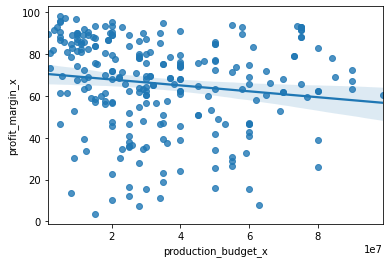

In [505]:
sns.regplot(x=df_profit3["production_budget_x"], y=df_profit3["profit_margin_x"])
plt.show()

Conclusion:
- Would ya look at that, this might be the ID we need to link an ID to a title, which could link us to the rest of the data
- We should probably look and see what the difference is between the domestic_gross represented here versus domestic_gross in "bom.movie_gross.csv.gz"
- This data set likely is going to be very valuable in linking together the different csv files

In [474]:
df_master = pd.read_csv('df.csv')

In [475]:
df_master1 = df_master.merge(df_directors_id, on=['movie_id'], how='inner')

In [494]:
df_master1.head(15)

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,year_x,month,movie_and_year,...,year_y,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,category,primary_name
0,2,23,2017-04-14,The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,2017,Apr,The Fate of the Furious - 2017,...,2017,tt4630562,The Fate of the Furious,The Fate of the Furious,2017.0,136.0,"Action,Crime,Thriller",nm0336620,director,F. Gary Gray
1,3,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,Jun,Jurassic World - 2015,...,2015,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",nm1119880,director,Colin Trevorrow
2,4,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,Feb,Black Panther - 2018,...,2018,tt1825683,Black Panther,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi",nm3363032,director,Ryan Coogler
3,5,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,2018,Jun,Incredibles 2 - 2018,...,2018,tt3606756,Incredibles 2,Incredibles 2,2018.0,118.0,"Action,Adventure,Animation",nm0083348,director,Brad Bird
4,6,46,2016-06-17,Finding Dory,200000000.0,486295561.0,1.021215e+09,2016,Jun,Finding Dory - 2016,...,2016,tt2277860,Finding Dory,Finding Dory,2016.0,97.0,"Adventure,Animation,Comedy",nm0004056,director,Andrew Stanton
5,6,46,2016-06-17,Finding Dory,200000000.0,486295561.0,1.021215e+09,2016,Jun,Finding Dory - 2016,...,2016,tt2277860,Finding Dory,Finding Dory,2016.0,97.0,"Adventure,Animation,Comedy",nm0533691,director,Angus MacLane
6,7,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,2015,Apr,Furious 7 - 2015,...,2015,tt2820852,Furious 7,Furious Seven,2015.0,137.0,"Action,Crime,Thriller",nm1490123,director,James Wan
7,8,73,2015-11-25,The Good Dinosaur,187500000.0,123087120.0,3.337710e+08,2015,Nov,The Good Dinosaur - 2015,...,2015,tt1979388,The Good Dinosaur,The Good Dinosaur,2015.0,93.0,"Adventure,Animation,Comedy",nm0812307,director,Peter Sohn
8,11,84,2014-05-30,Maleficent,180000000.0,241407328.0,7.585367e+08,2014,May,Maleficent - 2014,...,2014,tt1587310,Maleficent,Maleficent,2014.0,97.0,"Action,Adventure,Family",nm0834902,director,Robert Stromberg
9,17,98,2015-06-19,Inside Out,175000000.0,356461711.0,8.542360e+08,2015,Jun,Inside Out - 2015,...,2015,tt2096673,Inside Out,Inside Out,2015.0,95.0,"Adventure,Animation,Comedy",nm0230032,director,Pete Docter


In [477]:
df_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 222
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         223 non-null    int64  
 1   id                 223 non-null    int64  
 2   release_date       223 non-null    object 
 3   movie              223 non-null    object 
 4   production_budget  223 non-null    float64
 5   domestic_gross_x   223 non-null    float64
 6   worldwide_gross    223 non-null    float64
 7   year_x             223 non-null    int64  
 8   month              223 non-null    object 
 9   movie_and_year     223 non-null    object 
 10  profit             223 non-null    float64
 11  profit_margin      223 non-null    float64
 12  budget_tier        223 non-null    object 
 13  title              223 non-null    object 
 14  studio             223 non-null    object 
 15  domestic_gross_y   223 non-null    float64
 16  foreign_gross      208 non

In [488]:
df_master2 = df_master1.loc[df_master1['genres'].isin(['Drama','Comedy','Thriller', 'Action', 'Horror'])]

In [490]:
df_master2.head(10)

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,year_x,month,movie_and_year,...,year_y,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,category,primary_name
73,97,88,2015-12-25,Joy,60000000.0,56451232.0,101134059.0,2015,Dec,Joy - 2015,...,2015,tt2446980,Joy,Joy,2015.0,124.0,Drama,nm0751102,director,David O. Russell
115,179,57,2015-12-18,Sisters,30000000.0,87044645.0,106030660.0,2015,Dec,Sisters - 2015,...,2015,tt1850457,Sisters,Sisters,2015.0,118.0,Comedy,nm0601337,director,Jason Moore
124,193,17,2016-04-08,The Boss,29000000.0,63077560.0,78652207.0,2016,Apr,The Boss - 2016,...,2016,tt2702724,The Boss,The Boss,2016.0,99.0,Comedy,nm1229520,director,Ben Falcone
127,200,50,2018-06-15,Tag,28000000.0,54730625.0,77026186.0,2018,Jun,Tag - 2018,...,2018,tt2854926,Tag,Tag,2018.0,100.0,Comedy,nm1762961,director,Jeff Tomsic
133,215,29,2017-02-17,Fist Fight,25000000.0,32187017.0,40286416.0,2017,Feb,Fist Fight - 2017,...,2017,tt3401882,Fist Fight,Fist Fight,2017.0,91.0,Comedy,nm0007193,director,Richie Keen
138,224,73,2015-01-16,The Wedding Ringer,23000000.0,64460211.0,80171596.0,2015,Jan,The Wedding Ringer - 2015,...,2015,tt0884732,The Wedding Ringer,The Wedding Ringer,2015.0,101.0,Comedy,nm1275670,director,Jeremy Garelick
142,231,60,2018-04-06,Blockers,21000000.0,60311495.0,94045328.0,2018,Apr,Blockers - 2018,...,2018,tt2531344,Blockers,Blockers,2018.0,102.0,Comedy,nm0134224,director,Kay Cannon
148,240,34,2015-11-06,Spotlight,20000000.0,45055776.0,92088460.0,2015,Nov,Spotlight - 2015,...,2015,tt7785302,Spotlight,Spotlight,2015.0,99.0,Drama,nm8971368,director,Sunkanmi Adebayo
155,252,64,2014-05-09,Neighbors,18000000.0,150086800.0,270944428.0,2014,May,Neighbors - 2014,...,2014,tt2004420,Neighbors,Neighbors,2014.0,97.0,Comedy,nm0831557,director,Nicholas Stoller
175,301,62,2016-01-22,Dirty Grandpa,11500000.0,35593113.0,105078449.0,2016,Jan,Dirty Grandpa - 2016,...,2016,tt1860213,Dirty Grandpa,Dirty Grandpa,2016.0,102.0,Comedy,nm0563243,director,Dan Mazer


In [489]:
df_master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 73 to 221
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15 non-null     int64  
 1   id                 15 non-null     int64  
 2   release_date       15 non-null     object 
 3   movie              15 non-null     object 
 4   production_budget  15 non-null     float64
 5   domestic_gross_x   15 non-null     float64
 6   worldwide_gross    15 non-null     float64
 7   year_x             15 non-null     int64  
 8   month              15 non-null     object 
 9   movie_and_year     15 non-null     object 
 10  profit             15 non-null     float64
 11  profit_margin      15 non-null     float64
 12  budget_tier        15 non-null     object 
 13  title              15 non-null     object 
 14  studio             15 non-null     object 
 15  domestic_gross_y   15 non-null     float64
 16  foreign_gross      14 non-

In [ ]:
#df_persons_IDname = df_persons.filter(['person_id', 'primary_name'], axis=1)
#df_persons_IDname.head(10)
##
#df_p_dirmovieID = df_principals.filter(['person_id', 'movie_id', 'category'], axis=1)
#df_directors_IDs = df_p_dirmovieID.loc[df_p_dirmovieID['category'].isin(['director'])]
##
#df_directors_id = df_directors_IDs.merge(df_persons_IDname, on='person_id', how='inner')
#df_directors_id.head(7)
###
#df_master = pd.read_csv('df.csv')
#df_master1 = df_master.merge(df_directors_id, on=['movie_id'], how='inner')
#df_master1.info()